In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()

reverse_word_index = dict([value,key] for (key, value) in word_index.items())

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [7]:
train_labels[10]

3

In [8]:
import numpy as np

In [9]:
def vectorize_seq(seq, dim = 10000):
    results = np.zeros((len(seq),dim))
    for i, seq in enumerate(seq):
        results[i,seq] = 1
    return results

In [10]:
x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

In [11]:
def to_one_hot(lebs,dim = 46):
    results = np.zeros((len(lebs),dim))
    for i, leb in enumerate(lebs):
        results[i,leb] = 1
    return results

In [12]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from keras import models
from keras import layers

In [14]:
model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 218us/step - loss: 2.4783 - accuracy: 0.5421 - val_loss: 1.6432 - val_accuracy: 0.6380
Epoch 2/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.3570 - accuracy: 0.7083 - val_loss: 1.2964 - val_accuracy: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.0232 - accuracy: 0.7810 - val_loss: 1.1130 - val_accuracy: 0.7600
Epoch 4/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.8121 - accuracy: 0.8270 - val_loss: 1.0146 - val_accuracy: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.6489 - accuracy: 0.8617 - val_loss: 0.9870 - val_accuracy: 0.7860
Epoch 6/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.5154 - accuracy: 0.8938 - val_loss: 0.9441 - val_accuracy: 0.7960
Epoch 7/20
7982/7982 [==============================] - 1s 101us/step - loss

In [18]:
import matplotlib.pyplot as plt

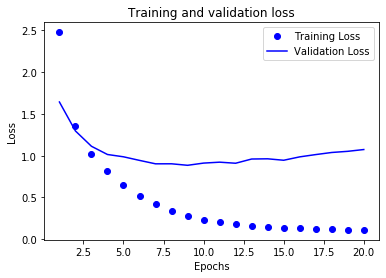

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

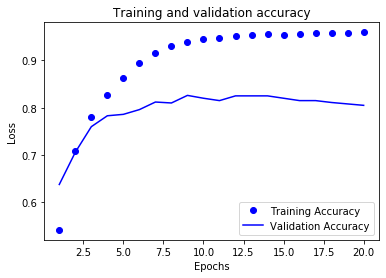

In [23]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))


results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 116us/step - loss: 2.6742 - accuracy: 0.5519 - val_loss: 1.7389 - val_accuracy: 0.6470
Epoch 2/9
7982/7982 [==============================] - 1s 101us/step - loss: 1.4074 - accuracy: 0.7147 - val_loss: 1.2885 - val_accuracy: 0.7280
Epoch 3/9
7982/7982 [==============================] - 1s 101us/step - loss: 1.0182 - accuracy: 0.7873 - val_loss: 1.1501 - val_accuracy: 0.7590
Epoch 4/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.7971 - accuracy: 0.8353 - val_loss: 1.0280 - val_accuracy: 0.7860
Epoch 5/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.6299 - accuracy: 0.8703 - val_loss: 0.9674 - val_accuracy: 0.8030
Epoch 6/9
7982/7982 [==============================] - 1s 104us/step - loss: 0.5012 - accuracy: 0.8983 - val_loss: 0.9441 - val_accuracy: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.404

In [26]:
results

[0.9835228357374509, 0.7849510312080383]

In [27]:
import copy

In [28]:
test_labels_copy = copy.copy(test_labels)

np.random.shuffle(test_labels_copy)

hits_array = np.array(test_labels) == np.array(test_labels_copy)

float(np.sum(hits_array)) / len(test_labels)

0.19946571682991987

In [29]:
predictions = model.predict(x_test)

In [30]:
predictions[0].shape

(46,)

In [31]:
np.sum(predictions[0])

1.0

In [32]:
np.argmax(predictions[0])

3

In [33]:
predictions[0][3]

0.9448518

In [34]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_caategorical_crossentropy',metricss=['acc'])